In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

## Data collection and processing

In [2]:
# load data
df = pd.read_csv('./datasets/car data.csv')

In [3]:
# first 5 rows
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
# check number of rows
df.shape

(301, 9)

In [7]:
# get dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
# retrive # of missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
# check distribution of categorical data
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


## Encoding categorical data

In [14]:
# encoding 'Fuel_Type' column
df.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)

# encoding 'Seller_Type' column
df.replace({'Seller_Type': {'Dealer': 0, 'Individual': 1}}, inplace=True)

# encoding 'Transmission' column
df.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)

In [15]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


## Splitting data and target

In [17]:
X = df.drop(['Car_Name', 'Selling_Price'], axis=1)
Y = df['Selling_Price']

In [19]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


## Splitting train/test data

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

## Model training
- Linear Regression

In [54]:
# loading the LR model
lin_reg_model = LinearRegression()

In [55]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

### Model Evaluation

In [56]:
# prediction on Training data
train_data_pred = lin_reg_model.predict(X_train)

In [57]:
# R squared Error
error_score = metrics.r2_score(Y_train, train_data_pred)
print("R^2 error: ", error_score)

R^2 error:  0.8799451660493698


### Visualize the actual prices and the predicted prices

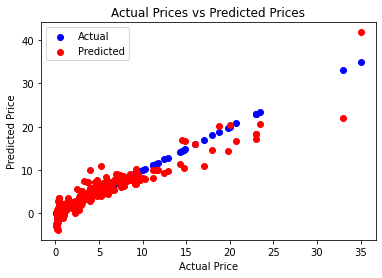

In [58]:
plt.scatter(Y_train, Y_train, color='blue', label='Actual')
plt.scatter(Y_train, train_data_pred, color='red', label='Predicted')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.legend()
plt.show()

In [59]:
# prediction on Test data
test_data_pred = lin_reg_model.predict(X_test)

In [60]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_pred)
print("R^2 error: ", error_score)

R^2 error:  0.8365766715026905


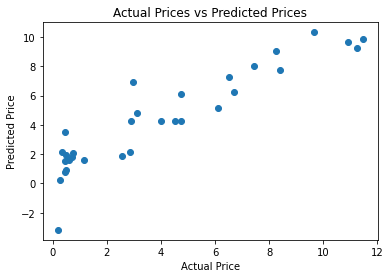

In [61]:
plt.scatter(Y_test, test_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

## Lasso Regression

In [62]:
# loading the LR model
lasso_reg_model = Lasso()

In [63]:
lasso_reg_model.fit(X_train, Y_train)

Lasso()

### Model evaluation

In [64]:
# prediction on Training data
train_data_pred = lasso_reg_model.predict(X_train)

In [65]:
# R squared Error
error_score = metrics.r2_score(Y_train, train_data_pred)
print("R^2 error: ", error_score)

R^2 error:  0.8427856123435794


### Visualize the actual prices and the predicted prices

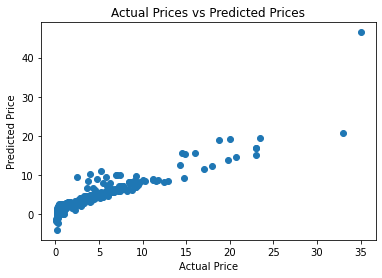

In [70]:
plt.scatter(Y_train, train_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [67]:
# prediction on Test data
test_data_pred = lasso_reg_model.predict(X_test)

In [68]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_pred)
print("R^2 error: ", error_score)

R^2 error:  0.8709167941173195


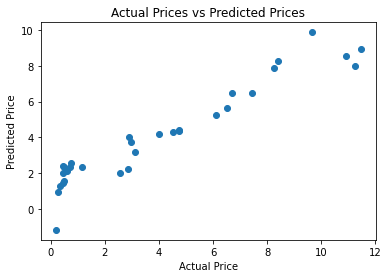

In [71]:
plt.scatter(Y_test, test_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()